Topics for this lecture...
###### 1) Read CSV
###### 2) Write CSV
###### 3) Read Excel
###### 4) Write Excel

In [1]:
import pandas as pd

In [2]:
sd = pd.read_csv('D:\\Pandas\\CodeBasic\\datasets\\04stock_data.csv', sep = '\t') 

This is us reading a CSV file into Pandas to create a df as we have done many times before

In [3]:
sd # This just shows that the data has successfully imported into pandas and our df 

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


Sometimes your CSV file has a title to the data which appears above the column name. This can be done so that humans know what the data represents but this can cause problems when we import that file into a pandas df...

In [4]:
sd02 = pd.read_csv('D:\\Pandas\\CodeBasic\\datasets\\04stock_data02.csv') 

In [5]:
sd02

,Stocks Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


What's happened here is that pandas has imported the spreadsheet title as a header and the line that should be the header has become part of the data. What we want to do here is to import from the second line...

In [6]:
sd03 = pd.read_csv('D:\\Pandas\\CodeBasic\\datasets\\04stock_data02.csv', skiprows = 1) 

We use the skiprows argument to tell Pandas to skip one row. It will then skip the first line from the top (that's how it works). That should give us the result that we want. We could also have used header=1 rather than skiprows. This tells pandas that my header information is located at row number 1 rather than row zero.

In [7]:
sd03 # Shows that this method works as we expected

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


If your file is missing a header then you have to specify the header=0...

In [8]:
sd04 = pd.read_csv('D:\\Pandas\\CodeBasic\\datasets\\04stock_data03.csv', header=None) 

In [9]:
sd04 # Pandas now generates the column names for us as there are none specified by the file. 

,0,1,2,3,4
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


The problem is that these are not very useful so we have to provide the column names manually during the df creation command...

In [10]:
sd04 = pd.read_csv('D:\\Pandas\\CodeBasic\\datasets\\04stock_data03.csv', header=None, names = ['ticker', 'eps', 'revenue', 'price', 'people']) 

In [11]:
sd04 # Although labour intensive, it does work very well

,ticker,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


Whenever you have a missing header you can use header=0 and then names=[list of column names in order]

###### Limit the number of lines imported
If your data file is very big and you only want to read a small number of rows from it, you can use the nrows argument...

In [12]:
sdnrows = pd.read_csv('D:\\Pandas\\CodeBasic\\datasets\\04stock_data.csv', sep = '\t', nrows = 3) 

In [13]:
sdnrows # This literally only imports the first three rows of the data into your df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1.00,85,64,bill gates


###### How to deal with problem values

In [14]:
sd # Here we have "not available" and "n.a." which doesn't help us. We can change how these are displayed

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [15]:
sd = pd.read_csv('D:\\Pandas\\CodeBasic\\datasets\\04stock_data.csv', na_values = ['not available', 'n.a.'], sep = '\t') 

Here we have specified a cpouple of values that appear in our df that we don't like and would like them to appear as NaN

In [16]:
sd # This is useful in cleaning up any messy data that you might encounter

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


###### We (still) have a problem

The -1 in the revenue column is a mistake as companies revenues must be either zero or greater. However, if we add -1 to the na_values argument it will change the -1 in the eps column which is correct. We do not want to change this value to NaN. This is how we solve this problem...

In [17]:
sd = pd.read_csv('D:\\Pandas\\CodeBasic\\datasets\\04stock_data.csv', na_values={
        'eps': ['not available', 'n.a.'],
        'revenue': ['not available', 'n.a.', -1],
        'people': ['not available','n.a.']
    }, sep = '\t')

The above dictionaries specify which values in which columns are to be converted to NaN when they appear. However, we forgot to mention the price column and the n.a. in there, which was caught by the first more general command, has been missed by the second more specific command. However, the second column allows us to be much more granular when we need to be

In [20]:
sd # Note that the -1 in the earnings per share column is still -1 but the -1 in the revenue column has been changed to NaN

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845,larry page
1,WMT,4.61,484.0,65,NaN
2,MSFT,-1.00,85.0,64,bill gates
3,RIL,NaN,50.0,1023,mukesh ambani
4,TATA,5.60,NaN,n.a.,ratan tata


###### 2) Write to a CSV file

In [22]:
sd.to_csv('04sdto.csv') # This seems to have executed just fine

The syntax here is dataframe.to_csv to write to the new csv file. The ('04sdto.csv') is the filename of the CSV file that I am writing to. (This one happens to be in the same location as my notebook so there is no need for a path.)

In [26]:
from IPython.display import Image # To be able to diplay pictures in my notebook

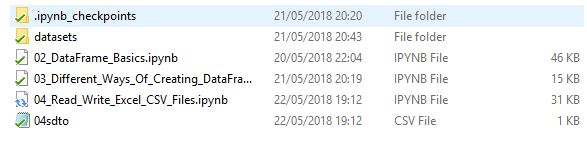

In [32]:
Image(filename = '04sdtocsv.jpg') # We can see that the command did execute as intended

The one downside of this operation is that it actually includes the index as well. To make sure that the index is not included in the data that you write to the file...

In [33]:
sd.to_csv('04sdto.csv', index = False)

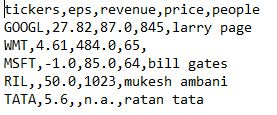

In [34]:
Image(filename = '04sdtocsv-noindex.jpg') # Here we see that the index is no longer included as part of the file data

To export only the columns that you want, rather than the whole df, you can specify which columns to export to the CSV file...

In [36]:
sd.to_csv('04sdto.csv', columns = ['tickers', 'eps'], index = False)

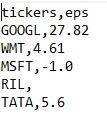

In [37]:
Image(filename = '04sdtocsv-columns.jpg') # This works just fine even tho the formatting looks a bit awry.

To export the df to a CSV file but remove the header information, simply add this argument to the command...

In [38]:
sd.to_csv('04sdto.csv', columns = ['tickers', 'eps'], header = False, index = False)

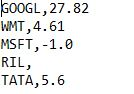

In [40]:
Image(filename = '04sdtocsv-noheader.jpg') # Again, this seems to work very well...